## Heart Disease

Heart disease, also known as cardiovascular disease, is the leading cause of death in the US. It includes conditions that block or weak the vessels that carry blood-oxygen to the heart (coronary heart disease), as well as conditions that directly affect the cardiac muscle (i.e. congenital heart defects).

In this notebook I will compare the performance of Logistic Regression and Random Forest in predicting heart disease.

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
sns.set_style("white")

%matplotlib inline

**Change pandas settings to display all rows and columns**

In [2]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

**Importing the dataset**

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/heart-disease-uci/heart.csv


In [4]:
heart = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

### Dataset Description


**Variables**

**1 age** in years

**2 sex:** 0 = female; 1 = male

**3 cp:** chest pain type ( 0 = typical angina ; 1 = atypical angina; 2 = non-anginal pain; 3 = asymptomatic)

**4 trestbps:** resting blood pressure (mmHg at the admission to the hospital)

**5 chol:** serum cholesterol in mg/dl

**6 fbs:** fasting blood sugar in mg/dl (0 = < 120; 1 = > 120)

**7 restecg:** resting electrocardiographic results (0 = hypertrophy; 1 = normal; 2 = having ST-T wave)

**8 thalac:** maximum heart rate achieved

**9 exang:** exercise induced angina (0 = no; 1 = yes)

**10 oldpeak:** ST depression induced by exercise relative to rest

**11 slope:** the slope of the peak exercise ST segment (0 = downslope; 1 = flat; 2 = upslope)

**12 ca:** number of major vessels colored by flouroscopy (0-3)

**13 thal:** thallium stress test. A nuclear imaging test that measures how well the blood flows into the heart 
             (1 = fixed defect; 2 = normal;  3 = reversable defect)

**14 target:** 0 = no heart disease; 1 = heart disease



**Dataset structure**

In [5]:
print(f"Number of rows: {heart.shape[0]}")
print(f"Number of columns: {heart.shape[1]}")

Number of rows: 303
Number of columns: 14


**Inspect a few rows of the dataset**

In [6]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
heart.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3,1
120,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3,1


The dataset contains only numerical variables.

**General information about the dataset**

In [9]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Dataset Summary

**Variables**

Independent variables: 13

Dependent variables: 1

Continuous variables: 5

Categorical variables: 9

**Data type**

Integer: 13

float: 1

**Missing values:** 0


**Check for duplicated entries**

In [10]:
heart.duplicated().sum()

1

**print the duplicated entries.**

In [11]:
duplicates = heart[heart.duplicated(keep = False)]
duplicates

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Because it is very unlikely that two entries recorded one after the other have the same values for all the variables, I will consider this as an error in data entry and drop one of the rows. The proper way to proceede would be to check with the people that collected the data and ask if these two entries are duplicates or not (even because this dataset is only a portion of the original dataset).

In [12]:
heart.drop_duplicates(inplace = True)

In [13]:
heart.duplicated().sum()

0

**Reset the index**

In [14]:
heart.reset_index(inplace = True, drop = True)

In [15]:
heart.iloc[163: 166]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
165,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0


The index was resetted correctly.

Check if the number of unique values in the categorical variables matches the number reported in the dataset description.

In [16]:
heart[["sex", "cp", "fbs", "restecg", "exang", "slope", 
       "ca", "thal", "target"]].nunique()

sex        2
cp         4
fbs        2
restecg    3
exang      2
slope      3
ca         5
thal       4
target     2
dtype: int64

ca has 5 unique values and thal has 4 unique values. According to the dataset description these variables should have 4 and 3 unique values, respectively.

Print the unique values.

In [17]:
for column in heart.columns:
    if heart[column].nunique() < 6:
        print(f"{column} : {heart[column].unique()}") 

sex : [1 0]
cp : [3 2 1 0]
fbs : [1 0]
restecg : [0 1 2]
exang : [0 1]
slope : [0 2 1]
ca : [0 2 1 3 4]
thal : [1 2 3 0]
target : [1 0]


The value 4 in ca and 0 in thal are not reported in the description.

How many entries have 4 in ca and/or 0 in thal?

In [18]:
heart[heart['ca'] == 4].value_counts().sum()

4

In [19]:
heart[heart['thal'] == 0].value_counts().sum()

2

Four entries have a ca value of 4 and two entries have a thal value of 2.

Because these values are not reported in the dataset description and their number is low, I will consider them as missing values.

Of course the proper thing to do would be to check with the people that collected the data.

In [20]:
heart.replace({"ca" : {4: np.NaN}, "thal": {0: np.NaN}}, 
              inplace = True)

In [21]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

#### Dealing with missing values

A common option when dealing with categorical variables is to replace the missing value with the mode (most common value) of the variable. I will replace the NaN with the most common value by target status.

In [22]:
heart.groupby("target")["ca"].value_counts()

target  ca 
0       0.0     45
        1.0     44
        2.0     31
        3.0     17
1       0.0    130
        1.0     21
        2.0      7
        3.0      3
Name: ca, dtype: int64

The most common value for ca in both people with heart disease and healthy people is 0, so I will replace NaN with 0.

In [23]:
heart["ca"].fillna(0, inplace = True)

What is the most common value in the thal variable?

In [24]:
heart.groupby("target")["thal"].value_counts()

target  thal
0       3.0      89
        2.0      36
        1.0      12
1       2.0     129
        3.0      28
        1.0       6
Name: thal, dtype: int64

The most common value for thal is 3 in healthy people and 2 in people with heart disease.

In [25]:
heart[heart["thal"].isnull()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0.0,NaN,1
280,52,1,0,128,204,1,1,156,1,1.0,1,0.0,NaN,0


Replace NaN with 2 in entry 48 and with 3 in entry 280.

In [26]:
heart.loc[[48], "thal"] = 2
heart.loc[[280], "thal"] = 3

In [27]:
heart[["ca", "thal"]].isnull().sum()

ca      0
thal    0
dtype: int64

Check the data type of ca and thal

In [28]:
heart[["ca", "thal"]].dtypes

ca      float64
thal    float64
dtype: object

When I replaced the missing values, the datatype of ca and thal was changed from integer to float.

In [29]:
heart[["ca", "thal"]] = heart[["ca", "thal"]].astype("int64")

In [30]:
heart[["ca", "thal"]].dtypes

ca      int64
thal    int64
dtype: object

**Changing variable' names**

The name of some variables are not easy to interpret so I will change them.

In [31]:
heart.rename(columns = {"cp": "chest_pain", 
                        "trestbps": "blood_pressure", 
                        "chol": "cholesterol", 
                        "fbs": "blood_sugar", 
                        "restecg": "ecg_results", 
                        "thalach": "heart_rate", 
                        "exang": "exercise_angina",
                        "oldpeak": "ST_depression", 
                        "slope": "ST_slope", 
                        "ca": "positive_vessels", 
                        "thal": "thallium", 
                        "target": "heart_disease"}, 
             inplace = True)

**save a copy of the dataset**

In [32]:
heart1 = heart.copy()

**Change variable labels**

To make the exploratory data analysis easier to interpret, I will replace the numbers in the sex variable and in all the categorical variables with more than 2 options with the corresponding category. 

In [33]:
heart.replace({"sex": {0: 'female', 1: 'male'},
              "chest_pain": {0: "asymptomatic", 
                             1: "atypical angina", 
                             2: "non-angina", 3: "angina"}, 
              "ecg_results": {0: "hypertrophy", 
                              1: "normal", 2: "ST-T wave"}, 
              "ST_slope": {0: "downslope", 1: "flat", 
                           2: "upslope"}, 
              "thallium": {1: "fixed defect", 
                           2: "normal", 3: "reversable defect"}}, 
              inplace = True)

In [34]:
heart.head(2)

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,ecg_results,heart_rate,exercise_angina,ST_depression,ST_slope,positive_vessels,thallium,heart_disease
0,63,male,angina,145,233,1,hypertrophy,150,0,2.3,downslope,0,fixed defect,1
1,37,male,non-angina,130,250,0,normal,187,0,3.5,downslope,0,normal,1


### Heart Disease Risk Factors

Some risk factors for heart disease include:

- **age:** with age the wall of the blood vessesls tends to weaken.
- **sex:** men are at higher risk of developing heart disease
- **high blood pressure:** the high pressure can damage the blood vessels
- **high colesterol levels:** high colesterol levels can induce the formation of plaques in the blood vessels causing an inappropiate blood flux.
- **diabetes** high levels of sugars in the blood while fasting can contribute to the development of heart disease.

Other risk factors that are not included in this dataset include:

- Family history
- Smoking
- Obesity
- Stress


## Exploratory data analysis (EDA)

Number and percentage of patients by heart disease status

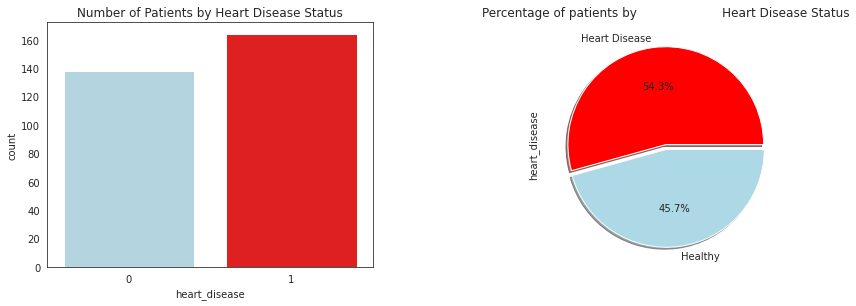

In [35]:
percentage = round(heart["heart_disease"].value_counts(normalize = True).mul(100), 1)
colors = ["Lightblue", "Red"]
explode = [0, 0.05]

fig = plt.figure(figsize =(18, 5))

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

ax0 = sns.countplot(x = "heart_disease", data = heart, 
                    palette = colors, ax = ax0)
ax0.set_title("Number of Patients by Heart Disease Status")

ax1 = percentage.plot(kind = "pie", colors = ["red", "lightblue"] , 
                      explode = explode, autopct = "%1.1f%%", 
                      shadow = True,figsize = (14, 4.5), 
                      labels = ("Heart Disease", "Healthy"),
                      title = ("Percentage of patients by\
                      Heart Disease Status"))

plt.subplots_adjust(wspace = 0.4)

The dataset is balanced between patients with heart disease and healthy patients.

**Heatmap of Pearson correlation**

Pearson's correlation measure the linear correlation between two variables. The Pearson's coefficient r can assume values between -1 and 1.

- -1: perfect negative correlation
- 0 : no correlation
- 1 : perfect positive correlation 

For this graph I will use the heart1 copy of the dataset, which still has all the variables in numerical format.

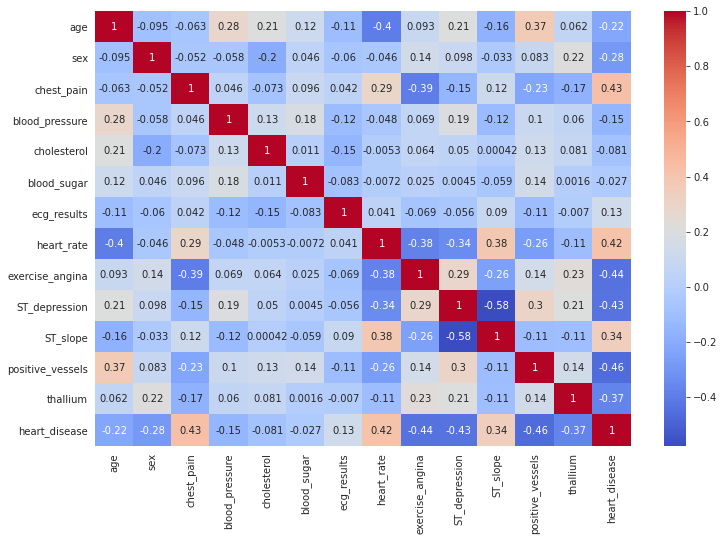

In [36]:
plt.figure(figsize = (12, 8))
sns.heatmap(heart1.corr(), annot = True, cmap = "coolwarm")
plt.show()

From the table above it is clear that there are no independent variables strongly correlated to each other, so in case I decide to use a linear model, I can use all variables without worrying about multicollinearity. 

In [37]:
heart[["sex", "chest_pain", "blood_sugar", 
       "ecg_results", "exercise_angina",
       "ST_slope", "positive_vessels", "heart_disease", 
       "thallium"]] = heart[["sex", "chest_pain", 
                             "blood_sugar", "ecg_results", 
                             "exercise_angina", "ST_slope", 
                             "positive_vessels", 
                             "heart_disease", 
                             "thallium"]].astype("category")

### Statistic summary

**Continuous variables**

In [38]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
blood_pressure,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
cholesterol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
heart_rate,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
ST_depression,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


**Categorical variables**

In [39]:
heart.describe(include = "category").T

,count,unique,top,freq
sex,302,2,male,206
chest_pain,302,4,asymptomatic,143
blood_sugar,302,2,0,257
ecg_results,302,3,normal,151
exercise_angina,302,2,0,203
ST_slope,302,3,upslope,141
positive_vessels,302,4,0,179
thallium,302,3,normal,166
heart_disease,302,2,1,164


**Pairplot of continuous variables by heart disease status.**

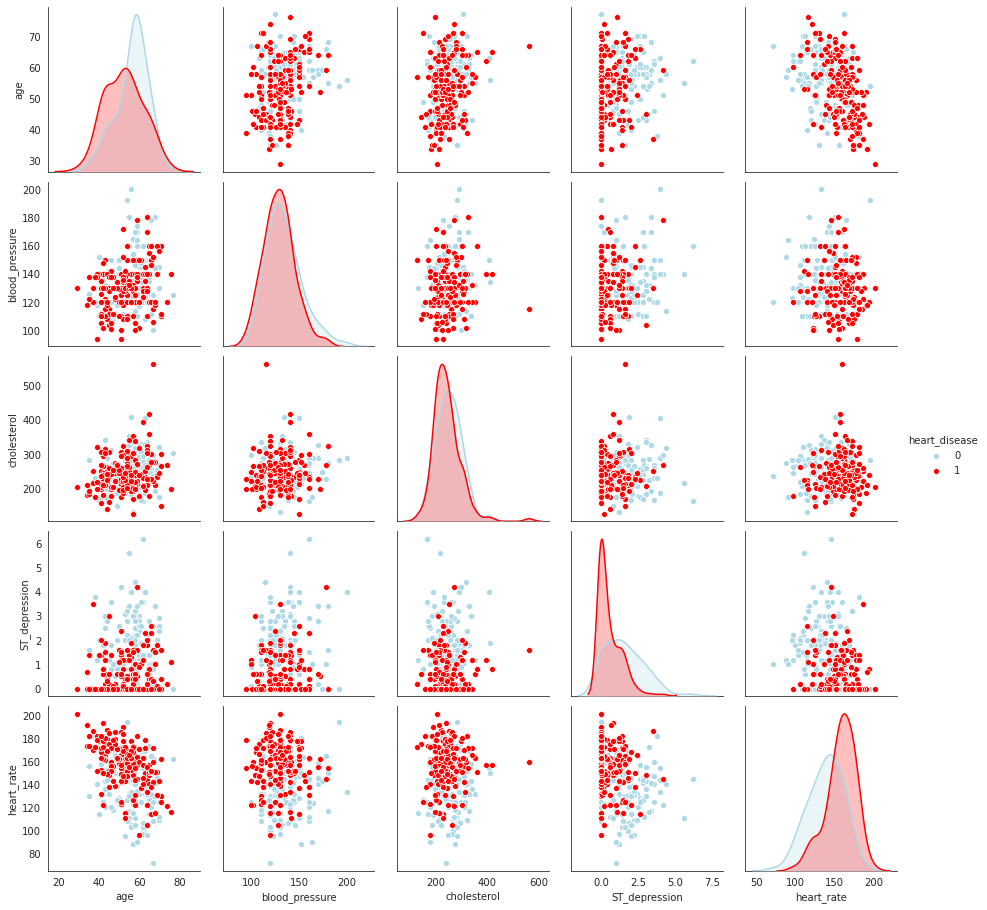

In [40]:
heart_cont_val = heart[["age", "blood_pressure", 
                        "cholesterol", "ST_depression",
                        "heart_rate", "heart_disease"]]

sns.pairplot(heart_cont_val, hue = "heart_disease", 
             palette = ["lightblue", "red"])
plt.show()

**Continuous variables**

**age:** The distribution of age suggest that the average age of people with heart disease is lower that the average age of healthy people.

**blood pressure:** the distribution of blood pressure in people with heart disease is very similar to the distribution in healthy people.

**cholesterol:** the distribution of cholesterol in people with heart disease is very similar to the distribution in healthy people.

**heart rate:** people with heart disease seem to have higher heart rate compared to healthy people.

**ST_depression:** people with heart disease seem to have a lower ST_depression compared to healthy people.

Blood pressure and cholesterol are two of the most important risk factors in heart disease. However for this dataset they might not be good predictors of heart disease.


**Number of heart disease cases by age**

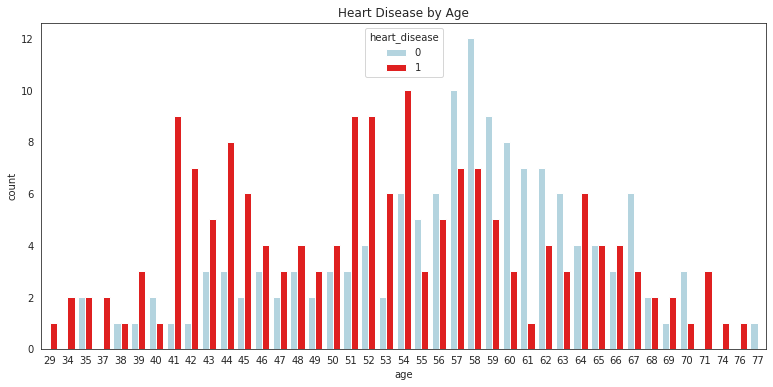

In [41]:
plt.figure(figsize = (13, 6))

sns.countplot("age", hue = "heart_disease", data = heart, 
              palette = ["lightblue", "red"])
plt.title("Heart Disease by Age")

plt.show()

From the graph above, it seems that heart disease is more common in people under 55-years-old.  I will check the the percentage of heart disease cases in people under 55-years-old and in people over 55-years-old.

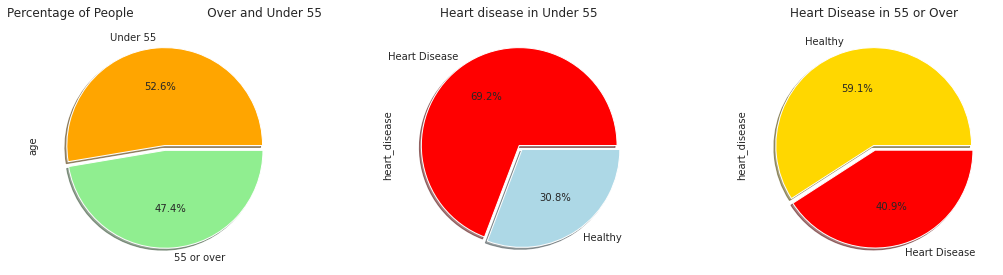

In [42]:
over_55 = (heart["age"] >= 55).value_counts(normalize = True).mul(100)
heart_older = heart[heart["age"] >= 55]["heart_disease"].value_counts(normalize = True).mul(100)
heart_younger = heart[heart["age"] < 55]["heart_disease"].value_counts(normalize = True).mul(100)

plt.figure(figsize = (18, 4.5))
explode = (0, 0.05)

ax0 = plt.subplot(1, 3, 1)
ax1 = plt.subplot(1, 3, 2)
ax2 = plt.subplot(1, 3, 3)

ax0 = over_55.plot(kind = "pie", shadow = True, 
                   explode = explode, autopct = "%1.1f%%", 
                   colors = ["orange", "lightgreen"], 
                   labels = ["Under 55", "55 or over"], 
                   title = "Percentage of People\
                   Over and Under 55", ax = ax0)

ax1 = heart_younger.plot(kind = "pie", shadow = True, 
                         explode = explode, autopct = "%1.1f%%", 
                         colors = ["red", "lightblue"],
                         labels = ["Heart Disease", "Healthy"], 
                         title = "Heart disease in Under 55", 
                         ax = ax1)

ax2 = heart_older.plot(kind = "pie", shadow = True, 
                       explode = explode, autopct = "%1.1f%%", 
                       colors = ["gold", "red"],
                       labels = ["Healthy", "Heart Disease"], 
                       title = "Heart Disease in 55 or Over", 
                       ax = ax2)

plt.show()

**Heart disease and age**

- The percentsges of people under 55-years-old and people over 55-years-old similar.

- 69% of people under 55 has heart disease.

- 41% of people over 55 has heart disease.

Age is an important risk factor in heart disease because with time blood vessels can get damaged or get weaker and not perform as well as in younger age.

In this dataset, however, heart disease occurs more frequently in younger people.


**Heart Disease by Gender**

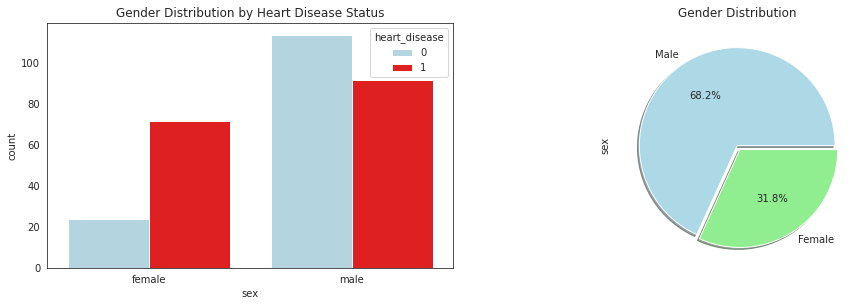

In [43]:
plt.figure(figsize = (16, 4.5))
percentage = heart["sex"].value_counts(normalize = True).mul(100)
explode = [0, 0.05]


ax0 = plt.subplot(1, 2, 1)
ax1 = plt.subplot(1, 2, 2)

ax0 = sns.countplot("sex", hue = "heart_disease",data = heart,
                    palette = ["lightblue", "red"], ax = ax0)
ax0.set_title("Gender Distribution by Heart Disease Status")

ax1 = percentage.plot(kind = "pie", shadow = True, 
                      colors = ["lightblue", "lightgreen"], 
                      explode = explode,
                      autopct = "%1.1f%%", 
                      labels = ["Male", "Female"],
                      title = "Gender Distribution")

plt.show()

**Gender and heart disease**



Check the percentage of men and women with heart disease.

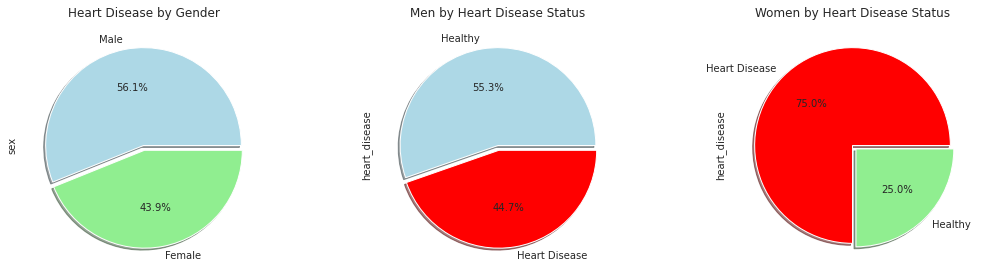

In [44]:
hdisease_positive = heart[heart["heart_disease"] == 1]["sex"].value_counts(normalize = True).mul(100)
heart_diseasem = heart[heart["sex"] == "male"]["heart_disease"].value_counts(normalize = True).mul(100)
heart_diseasew = heart[heart["sex"] == "female"]["heart_disease"].value_counts(normalize = True).mul(100)
explode = [0, 0.05]

fig = plt.figure(figsize = (18, 4.5))
ax0 = plt.subplot(1, 3, 1)
ax1 = plt.subplot(1, 3, 2)
ax2 = plt.subplot(1, 3, 3)

ax0 = hdisease_positive.plot(kind = "pie", shadow = True, 
                             explode = explode, 
                             colors = ["lightblue", "lightgreen"], 
                             ax = ax0, autopct = "%1.1f%%", 
                             labels = ["Male", "Female"], 
                             title = "Heart Disease by Gender")

ax1 = heart_diseasem.plot(kind = "pie", shadow = True, 
                          explode = explode, 
                          colors = ["lightblue", "red"], 
                          ax = ax1,autopct = "%1.1f%%", 
                          labels = ["Healthy", "Heart Disease"], 
                          title = "Men by Heart Disease Status")

ax2 = heart_diseasew.plot(kind = "pie", shadow = True, 
                          explode = explode, 
                          colors = ["red", "lightgreen"], 
                          ax = ax2, autopct = "%1.1f%%", 
                          labels = ["Heart Disease","Healthy"], 
                          title = "Women by Heart Disease Status")

plt.show()


**Heart disease and gender**

This dataset shows a surprisingly high incidence of heart disease in women. 

- 32% of the patients in the study are women, but they account for 44% of the heart disease cases

- 75% of the women in the study have heart disease compared to 45% of men.

**Categorical variables and heart disease**

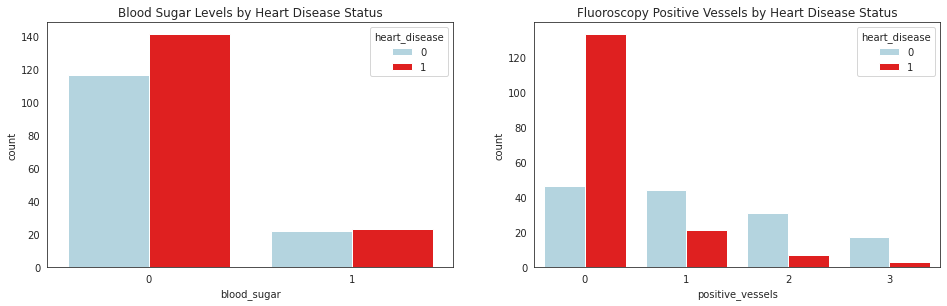

In [45]:
fig = plt.figure(figsize = (16, 4.5))
colors = ["lightblue", "red"]

ax0 = plt.subplot(1, 2, 1)
ax1 = plt.subplot(1, 2, 2)

sns.countplot("blood_sugar", hue = "heart_disease", 
              data = heart, palette = colors, ax = ax0)
ax0.set_title("Blood Sugar Levels by Heart Disease Status")

sns.countplot("positive_vessels", hue = "heart_disease", 
              data = heart, palette = colors)
plt.title("Fluoroscopy Positive Vessels by Heart Disease Status")

plt.show()

**Blood sugar**

- High level of glucose in the blood have no effect on the number of heart disease cases.
       
**Number of vessels positive to fluoroscopy**

- Heart disease is strongly associated with a negative test (no positive vessels).


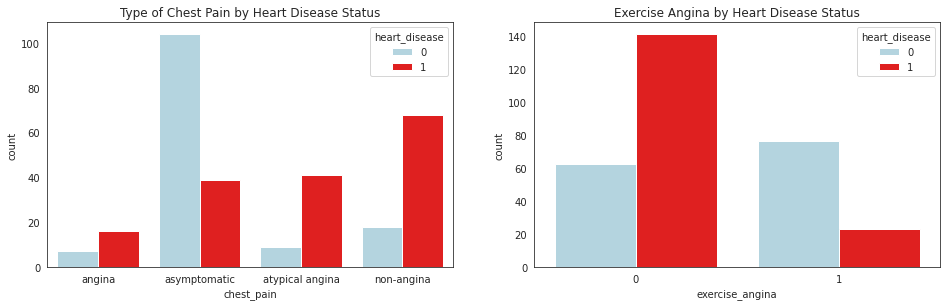

In [46]:
fig = plt.figure(figsize = (16, 4.5))
colors = ["lightblue", "red"]

ax0 = plt.subplot(1, 2, 1)
ax1 = plt.subplot(1, 2, 2)

ax0 = sns.countplot("chest_pain", hue = "heart_disease", 
                    data = heart, palette = colors, ax = ax0)
ax0.set_title("Type of Chest Pain by Heart Disease Status")

sns.countplot("exercise_angina", hue = "heart_disease", 
              data = heart, palette = colors)
ax1.set_title("Exercise Angina by Heart Disease Status")

plt.show()

**Chest pain**

- A non-angina type of chest pain is the most common in people with heart disease  
- Asymptomatic type of chest pain is associated with healthy individuals

**Angina during exercise**

- The lack of angina type chest pain during exercise is associated with heart disease

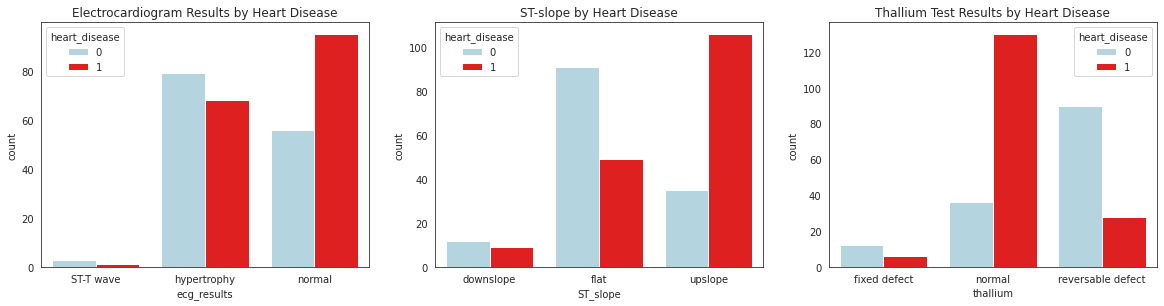

In [47]:
plt.figure(figsize = (20, 4.5))
colors = ["lightblue", "red"]

ax0 = plt.subplot(1, 3, 1)
ax1 = plt.subplot(1, 3, 2)
ax2 = plt.subplot(1, 3, 3)

sns.countplot("ecg_results", hue = "heart_disease", 
              data = heart,  palette = colors, ax = ax0)
ax0.set_title("Electrocardiogram Results by Heart Disease")

sns.countplot("ST_slope", hue = "heart_disease", 
              data = heart, palette = colors, ax = ax1)
ax1.set_title("ST-slope by Heart Disease")

sns.countplot("thallium", hue = "heart_disease", 
              data = heart, palette = colors, ax = ax2)
ax2.set_title("Thallium Test Results by Heart Disease")

plt.show()

**ECG results**

- normal ecg is the most common in people with heart disease. 

**ST-Slope results**

- upslope is most commonly associated with hearth disease

- a flat slope(no slope) is the most common result in healthy people

**Thallium test results:**

- A normal thallium test is strongly associated with heart disease

- A thallium test that shows a reversable defect is more commonly associated with healthy people

**Multivariate analysis**

In this section I will plot the variables heart rate and ST-depression against the categorical varaibles ST-slope, chest_pain, positive_vessels and thallium test to check whether some particular combination of factors can help us predict heart disease.


**Heart Rate**

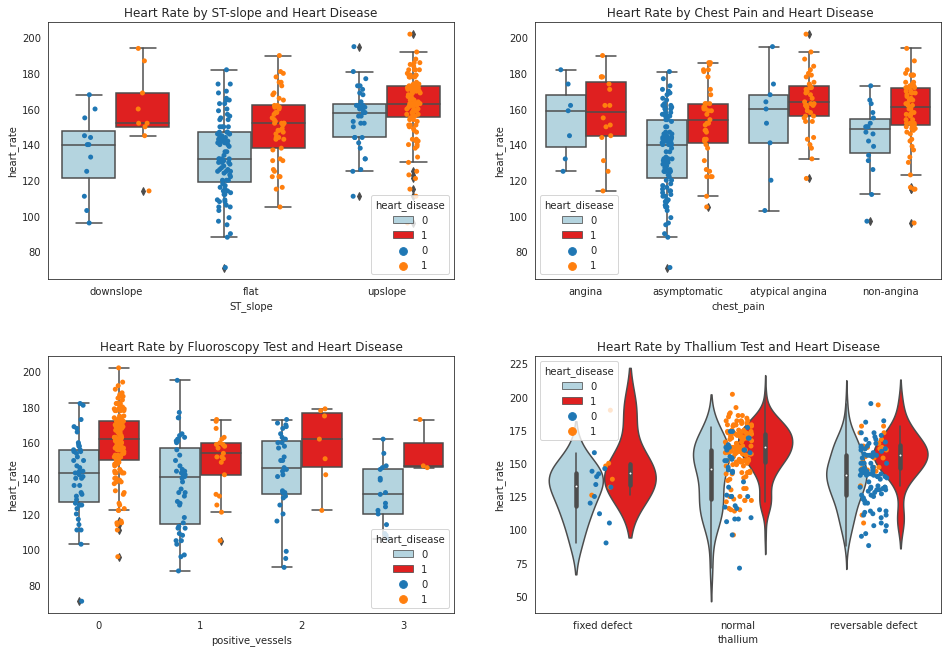

In [48]:
plt.figure(figsize = (16, 17))

ax0 = plt.subplot(3, 2, 1)
ax1 = plt.subplot(3, 2, 2)
ax2 = plt.subplot(3, 2, 3)
ax3 = plt.subplot(3, 2, 4)



sns.boxplot(x = "ST_slope", y = "heart_rate", 
            hue = "heart_disease", data = heart, 
            palette = ["lightblue", "red"], ax = ax0)
sns.stripplot(x = "ST_slope", y = "heart_rate", 
              hue = "heart_disease", data = heart, 
              dodge = True, ax = ax0, jitter = 1)
ax0.set_title("Heart Rate by ST-slope and Heart Disease")

sns.boxplot(x = "chest_pain", y = "heart_rate", 
            hue = "heart_disease", data = heart, 
            palette = ["lightblue", "red"], ax = ax1)
sns.stripplot(x = "chest_pain", y = "heart_rate", 
              hue = "heart_disease", data = heart, 
              dodge = True, ax = ax1, jitter = 1)
ax1.set_title(" Heart Rate by Chest Pain and Heart Disease")

sns.boxplot(x = "positive_vessels", y = "heart_rate", 
            hue = "heart_disease", data = heart, 
            palette = ["lightblue", "red"], ax = ax2)
sns.stripplot(x = "positive_vessels", y = "heart_rate", 
              hue = "heart_disease", data = heart, 
              ax = ax2, dodge = True, jitter = 1)
ax2.set_title("Heart Rate by Fluoroscopy Test and Heart Disease")

sns.violinplot(x = "thallium", y = "heart_rate", 
                     hue = "heart_disease", data = heart, 
                     palette = ["lightblue", "red"], ax = ax3)
sns.stripplot(x = "thallium", y = "heart_rate", 
              hue = "heart_disease", 
              data = heart, ax = ax3, jitter = 1)
ax3.set_title("Heart Rate by Thallium Test and Heart Disease")


plt.subplots_adjust(hspace = 0.3)

plt.show()


**ST-slope**

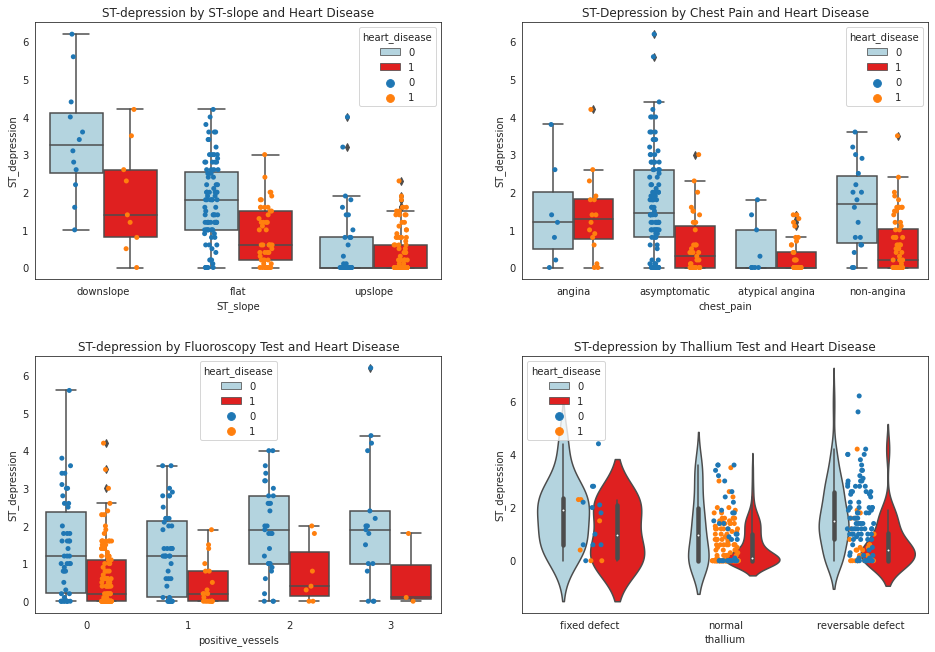

In [49]:
plt.figure(figsize = (16, 17))

ax0 = plt.subplot(3, 2, 1)
ax1 = plt.subplot(3, 2, 2)
ax2 = plt.subplot(3, 2, 3)
ax3 = plt.subplot(3, 2, 4)

sns.boxplot(x = "ST_slope", y = "ST_depression", 
            hue = "heart_disease", data = heart, 
            palette = ["lightblue", "red"], ax = ax0)
sns.stripplot(x = "ST_slope", y = "ST_depression", 
              hue = "heart_disease", data = heart, 
              ax = ax0, dodge = True, jitter = 1)
ax0.set_title("ST-depression by ST-slope and Heart Disease")

sns.boxplot(x = "chest_pain", y = "ST_depression", 
            hue = "heart_disease", data = heart, 
            palette = ["lightblue", "red"], ax = ax1)
sns.stripplot(x = "chest_pain", y = "ST_depression", 
              hue = "heart_disease", data = heart, 
              ax = ax1, dodge = True, jitter = 1)
ax1.set_title("ST-Depression by Chest Pain and Heart Disease")

sns.boxplot(x = "positive_vessels", y = "ST_depression", 
            hue = "heart_disease", data = heart, 
            palette = ["lightblue", "red"], ax = ax2)
sns.stripplot(x = "positive_vessels", y = "ST_depression",
              hue = "heart_disease", data = heart, 
              ax = ax2, dodge = True, jitter = 1)
ax2.set_title("ST-depression by Fluoroscopy Test and Heart Disease")


sns.violinplot(x = "thallium", y = "ST_depression", 
               hue = "heart_disease", data = heart, 
               palette = ["lightblue", "red"], ax = ax3)
sns.stripplot(x = "thallium", y = "ST_depression", 
              hue = "heart_disease", data = heart, 
              ax = ax3, jitter = 1)
ax3.set_title("ST-depression by Thallium Test and Heart Disease")


plt.subplots_adjust(hspace = 0.3)

plt.show()

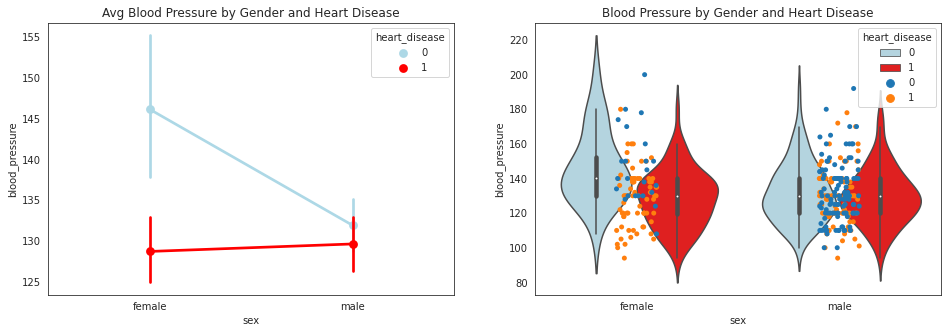

In [50]:
plt.figure(figsize = (16, 5))

ax0 = plt.subplot(1, 2, 1)
ax1 = plt.subplot(1, 2, 2)

sns.pointplot('sex', 'blood_pressure', hue = 'heart_disease', data = heart, palette =['lightblue', 'red'], ax = ax0)
ax0.set_title('Avg Blood Pressure by Gender and Heart Disease')

sns.violinplot('sex', 'blood_pressure', hue = 'heart_disease', data = heart, palette =['lightblue', 'red'], 
              ax = ax1)
sns.stripplot('sex', 'blood_pressure', hue = 'heart_disease', data = heart, ax = ax1)
ax1.set_title('Blood Pressure by Gender and Heart Disease')

plt.show()

**Blood Pressure and Gender**

- Healthy women have higher blood pressure compared to women with heart disease.
- The blood pressure of healthy men is similar to the blood pressure of men with heart disease.

## Heart Disease Prediction

**Importing modules for Machine Learning and model evaluation**

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Logistic Regression

Logistic regression is a classification model used to predict a binary outcome. It uses a sigmoid function to determine the probability that a specific observation belongs to a specific class. In our case the probability that a patient has heart disease. 

If the probability is over a specified threshold, the patient will be classified as having heart disease. If instead the probability is below the threshold, the patient will be classified as healthy.

**Separate the independent variables from the dependent variable**

In [52]:
y = heart[["heart_disease"]]
X = heart.drop("heart_disease", axis = 1)

print(f"X: {X.shape}") 
print(f"y: {y.shape}") 

X: (302, 13)
y: (302, 1)


**Get dummy variables for the categorical variables**

In [53]:
X = pd.get_dummies(X, drop_first = True)
X.head(2)

,age,blood_pressure,cholesterol,heart_rate,ST_depression,sex_male,chest_pain_asymptomatic,chest_pain_atypical angina,chest_pain_non-angina,blood_sugar_1,ecg_results_hypertrophy,ecg_results_normal,exercise_angina_1,ST_slope_flat,ST_slope_upslope,positive_vessels_1,positive_vessels_2,positive_vessels_3,thallium_normal,thallium_reversable defect
0,63,145,233,150,2.3,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,37,130,250,187,3.5,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0


**Scale continuous variables**

In [54]:
scaler = StandardScaler()

In [55]:
X[["age", "blood_pressure", 
   "cholesterol", 
   "heart_rate", 
   "ST_depression"]] = scaler.fit_transform(X[["age", 
                                            "blood_pressure", 
                                            "cholesterol", 
                                            "heart_rate", 
                                            "ST_depression" ]])
X.head()

,age,blood_pressure,cholesterol,heart_rate,ST_depression,sex_male,chest_pain_asymptomatic,chest_pain_atypical angina,chest_pain_non-angina,blood_sugar_1,ecg_results_hypertrophy,ecg_results_normal,exercise_angina_1,ST_slope_flat,ST_slope_upslope,positive_vessels_1,positive_vessels_2,positive_vessels_3,thallium_normal,thallium_reversable defect
0,0.949794,0.764066,-0.261285,0.018826,1.084022,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0


**Split the dataset in train and test set**

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                            test_size = 0.2, 
                                            random_state = 2)


print(f"X_train: {X_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (241, 20)
y_test: (61, 1)


**Create the regression object and fit it to the train set**

In [57]:
regr = LogisticRegression()
regr.fit(X_train, y_train)

LogisticRegression()

**Predict heart disease on the train set**

In [58]:
y_train_predict = regr.predict(X_train)

**Evaluate the model performance on the train set**

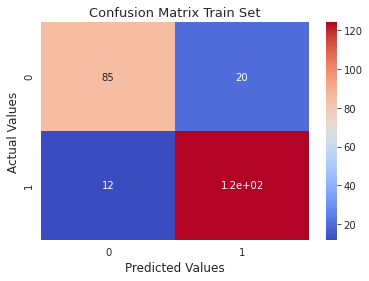

In [59]:
sns.heatmap(confusion_matrix(y_train, y_train_predict), 
            annot = True, cmap = "coolwarm")
plt.title('Confusion Matrix Train Set', size = 13)
plt.xlabel('Predicted Values', size = 12)
plt.ylabel('Actual Values', size = 12)

plt.show()

In [60]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       105
           1       0.86      0.91      0.89       136

    accuracy                           0.87       241
   macro avg       0.87      0.86      0.86       241
weighted avg       0.87      0.87      0.87       241



**Predicting heart diseased on the test set**

In [61]:
y_predict = regr.predict(X_test)

### Model Evaluation

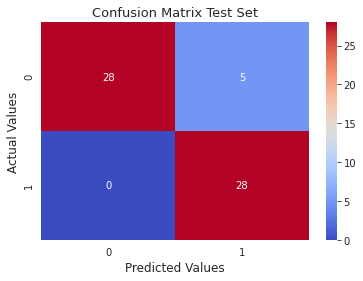

In [62]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True, 
            cmap = "coolwarm")
plt.title('Confusion Matrix Test Set', size = 13)
plt.xlabel('Predicted Values', size = 12)
plt.ylabel('Actual Values', size = 12)

plt.show()

**Confusion Matrix**

- The model correctly predicted all the true positive cases (with heart disease) 

- The model correctly predicted 28 out of 33 negative cases. 5 negative cases were predicted to be positive.

**Type I errors:** 5

**Type II errors:** 0

In [63]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        33
           1       0.85      1.00      0.92        28

    accuracy                           0.92        61
   macro avg       0.92      0.92      0.92        61
weighted avg       0.93      0.92      0.92        61



**Classification Report**

- **Precision:** TP/(TP + FP)

- **Recall:** TP/(TP + FN)

- **F1-score:** (2 x Recall x Precision)/Reacall + Precision

In [64]:
accuracy = accuracy_score(y_test, y_predict)
print(f"Logistic Regression Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.92


### Receiver Operating Characteristics curve (ROC curve)

The ROC curve shows how well the model can differentiate between classes.

The curve is created by plotting the rate of true positive values (TPR) against the rate of false positive values (FPR).

TPR = TP/TP + FN

FPR = FP/ TN + FP

In [65]:
from sklearn.metrics import roc_curve
y_pred_proba = regr.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

**ROC graph and AUC score**

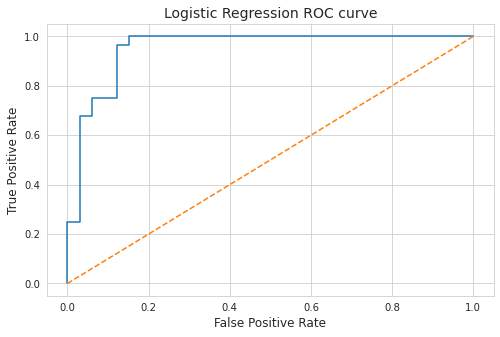

In [66]:
sns.set_style("whitegrid")
plt.figure(figsize = (8, 5))

plt.plot(fpr, tpr)
plt.plot((0, 1), ls = '--')
plt.xlabel("False Positive Rate", size = 12)
plt.ylabel("True Positive Rate", size = 12)
plt.title("Logistic Regression ROC curve", size = 14)
plt.show()

The dotted curve represent the performance of a random model. Points above the dotted line represent good classifications while points below the dotted line represent bad classifications.

The blue curve represent the performance of our model.

**Area under the curve (AUC)**

Meaning of AUC values:

- **close to 1:** the model is able to separate between the classes.
- **close to 0:** the model reciprocates between classes. 
- **0:** the model perfectly reciprocates between classes.
- **0.5:** the model has no ability to separate between classes.

In [67]:
auc = roc_auc_score(y_test, y_pred_proba)
print(f"Logistic Regression AUC: {auc:.2f}")

Logistic Regression AUC: 0.95


**Cross Validation**

Cross-validation gives an idea of how well a model can generalize from our dataset.

The model has performed well on this combination of train and test set. To check how well the model can generalize, I will evalueate the model on 5 different combination of train and test sets.

In [68]:
accuracies = cross_val_score(estimator = regr, X = X, y = y, 
                             cv = 5)
accuracies

array([0.86885246, 0.90163934, 0.81666667, 0.85      , 0.8       ])

In [69]:
avg_accuracy = accuracies.mean()
print(f"Average accuracy: {avg_accuracy:.2f}")

Average accuracy: 0.85


---

### Random Forest classification

Random Forest is an ensemble method that applies a number of decision trees to sub-samples of the dataset. The class of the specific observation is determined by averaging the results of the different trees. 

In [70]:
heart1.head(2)

,age,sex,chest_pain,blood_pressure,cholesterol,blood_sugar,ecg_results,heart_rate,exercise_angina,ST_depression,ST_slope,positive_vessels,thallium,heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [71]:
Xf = heart1.drop("heart_disease", axis = 1)
yf = heart1["heart_disease"]

In [72]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, 
                                                test_size = 0.2, 
                                                random_state = 2)

**Create the random model classifier and fit it to the train set**

In [73]:
rdf = RandomForestClassifier(random_state = 2)
rdf.fit(Xf_train, yf_train)

RandomForestClassifier(random_state=2)

**Predict heart disease on the test set**

In [74]:
yf_test_predict = rdf.predict(Xf_test)

### Model Evaluation

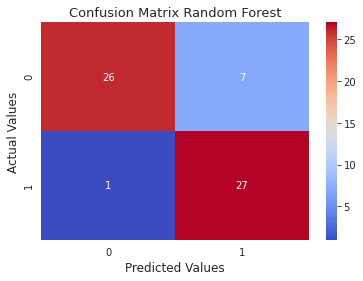

In [75]:
sns.heatmap(confusion_matrix(yf_test, yf_test_predict), 
            annot = True, cmap = "coolwarm")
plt.title('Confusion Matrix Random Forest',  size = 13)
plt.xlabel('Predicted Values', size = 12)
plt.ylabel('Actual Values', size = 12)
plt.show()

**Confusion Matrix**

- The model correctly predicted 27 out of 28 positive values. 1 positive value was predicted as negative
- The model correctly predicted 26 out of 33 negative values. 7 negative value were predicted as positive

**Type I errors:** 7

**Type II errors:** 1

In [76]:
print(classification_report(yf_test, yf_test_predict))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87        33
           1       0.79      0.96      0.87        28

    accuracy                           0.87        61
   macro avg       0.88      0.88      0.87        61
weighted avg       0.89      0.87      0.87        61



**Accuracy score**

In [77]:
accuracy_f = accuracy_score(yf_test, yf_test_predict)
print(f"Random Forest Accuracy: {accuracy_f:.2f}")

Random Forest Accuracy: 0.87


**ROC graph and AUC score**

In [78]:
yf_test_predict_prob = rdf.predict_proba(Xf_test)[:, 1]
fpr, tpr, threshold = roc_curve(yf_test, yf_test_predict_prob)

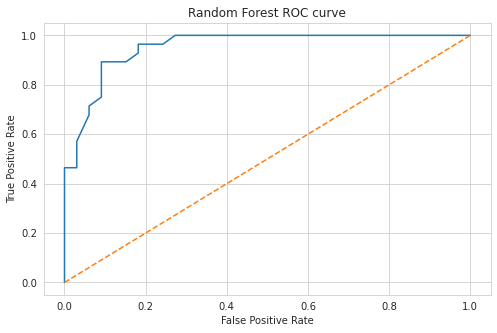

In [79]:
sns.set_style("whitegrid")
plt.figure(figsize = [8, 5])

plt.plot(fpr, tpr)
plt.plot((0,1), ls = "--")
plt.title("Random Forest ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [80]:
auc_f = roc_auc_score(yf_test, yf_test_predict_prob)
print(f"Random Forest AUC: {auc_f:.2f}")

Random Forest AUC: 0.95


**Cross Validation**

In [81]:
accuracies = cross_val_score(estimator = rdf, X = Xf, y = yf, 
                             cv = 5)
accuracies

array([0.83606557, 0.86885246, 0.81666667, 0.78333333, 0.78333333])

In [82]:
avg_accuracyf = accuracies.mean()
print(f"Random Forest Average Accuracy: {avg_accuracyf:.2f}")

Random Forest Average Accuracy: 0.82


**Comparing the performance of Logistic Regression and Random Forest** 

In [83]:
model_comparison = {"Logistic Regression": {
                          "Accuracy": accuracy, "AUC": auc, 
                          "Cross validation": avg_accuracy}, 
                    "Random Forest": {
                        "Accuracy": accuracy_f, "AUC": auc_f, 
                        "Cross validation": avg_accuracyf }}

In [84]:
model_comparison =pd.DataFrame(model_comparison)
model_comparison = model_comparison[model_comparison.columns].round(decimals = 2)
model_comparison.T

,Accuracy,AUC,Cross validation
Logistic Regression,0.92,0.95,0.85
Random Forest,0.87,0.95,0.82


## Conclusions

Logistic regression has performed better than Random Forest in terms of general accuracy and in cross validation. Both algorithms had an AUC of 0.95, which means that both models were able to differentiate between classes. Better results could be achieved by tuning the models but for this notebook I will stop here.

The analysis showed some interesting results:
- high incidence of heart disease in women and younger people.
- angina during exercise more common in healthy people.
- normal results on the thallium and ecg tests as the most commonly associated with heart disease.

If you found the notebook interesting, please upvote. 

Thank you.

Feedbacks are appreciated.